In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding,Dense,LSTM,Dropout,Flatten,BatchNormalization,Conv1D,GlobalMaxPooling1D,MaxPooling1D
from keras.optimizers import  SGD
from keras.regularizers import l2
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing import sequence
from keras.utils.np_utils import to_categorical
import string
import os

In [6]:
df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\UNSW-NB15 - CSV Files\\UNSW-NB15 - CSV Files\\train_alldata_EDA.csv")
df

,dur,sbytes,dbytes,sttl,dttl,sload,dload,spkts,swin,stcpb,...,state_INT,state_MAS,state_PAR,state_REQ,state_RST,state_TST,state_TXD,state_URH,state_URN,state_no
0,-0.040939,-0.075667,-0.227435,2.561444,-0.717760,-0.311536,-0.579909,-0.386708,-1.196045,-0.887412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.048315,-0.074104,-0.227435,-0.037542,-0.717760,0.801004,-0.579909,-0.413125,-1.196045,-0.887412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.047225,-0.032700,-0.083095,-0.426051,-0.041365,-0.300363,2.301677,0.088800,0.836096,-0.472257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010996,-0.025576,-0.204088,-0.426051,-0.041365,-0.311386,-0.571296,0.247302,0.836096,1.183060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.046950,-0.050912,-0.217172,-0.426051,-0.041365,-0.306391,-0.421690,-0.228205,0.836096,-0.218412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519886,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2519887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2519888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2519889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.isnull().sum()

dur          0
sbytes       0
dbytes       0
sttl         0
dttl         0
            ..
state_TST    0
state_TXD    0
state_URH    0
state_URN    0
state_no     0
Length: 197, dtype: int64

In [8]:
df_nan = df.isna()
print(df_nan)

           dur  sbytes  dbytes   sttl   dttl  sload  dload  spkts   swin  \
0        False   False   False  False  False  False  False  False  False   
1        False   False   False  False  False  False  False  False  False   
2        False   False   False  False  False  False  False  False  False   
3        False   False   False  False  False  False  False  False  False   
4        False   False   False  False  False  False  False  False  False   
...        ...     ...     ...    ...    ...    ...    ...    ...    ...   
2519886  False   False   False  False  False  False  False  False  False   
2519887  False   False   False  False  False  False  False  False  False   
2519888  False   False   False  False  False  False  False  False  False   
2519889  False   False   False  False  False  False  False  False  False   
2519890  False   False   False  False  False  False  False  False  False   

         stcpb  ...  state_INT  state_MAS  state_PAR  state_REQ  state_RST  \
0        

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519891 entries, 0 to 2519890
Columns: 197 entries, dur to state_no
dtypes: float64(197)
memory usage: 3.7 GB


In [11]:
import pandas as pd
import numpy as np
import random
import os
import time

def add_missing_values(csv_file, num_columns, num_cells, exclude_columns):
    # Load the csv file into a pandas DataFrame
    start_time = time.time()
    df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\UNSW-NB15 - CSV Files\\UNSW-NB15 - CSV Files\\train_alldata_EDA.csv")
    load_time = time.time() - start_time

    # Count the initial number of missing values
    initial_missing_values = df.isnull().sum()
    print(f"Initial number of missing values:\n{initial_missing_values}")

    # Get the list of all columns
    all_columns = df.columns.tolist()

    # Remove the excluded columns from the list of all columns
    for col in exclude_columns:
        if col in all_columns:
            all_columns.remove(col)

    # Check if the number of columns to be altered exceeds the total columns
    if num_columns > len(all_columns):
        print("The number of columns to be altered is more than the total number of columns in the file.")
        return

    # Calculate the number of missing values to be added in each column
    cells_per_column = num_cells // num_columns
    extra_cells = num_cells % num_columns

    # Randomly select 'num_columns' columns
    selected_columns = random.sample(all_columns, num_columns)

    # Initialize a DataFrame to keep track of which rows were modified
    modified_rows = pd.DataFrame(index=df.index)

    # Iterate over each selected column
    step_times = []
    for i, col in enumerate(selected_columns):
        # Distribute the extra cells among the first few columns
        extra = 1 if i < extra_cells else 0

        # Randomly select 'cells_per_column + extra' row indices
        start_time = time.time()
        row_indices = random.sample(range(len(df[col])), cells_per_column + extra)
        random_sampling_time = time.time() - start_time

        # Record the modified rows for this column
        modified_rows[col] = False
        modified_rows.loc[row_indices, col] = True

        step_times.append({
            'Column': col,
            'Random Sampling Time': random_sampling_time
        })

    
        
    for col in selected_columns:
    # Randomly select row indices for missing values
        missing_indices = np.random.choice(df.index, cells_per_column + extra, replace=False)
    
    # Set 'NaN' values in the selected column at the chosen indices
        df.loc[missing_indices, col] = np.nan

    # Count the final number of missing values
    final_missing_values = df.isnull().sum()
    print(f"Final number of missing values:\n{final_missing_values}")

    # Save the DataFrame to a new csv file
    start_time = time.time()
    base_dir, file_name = os.path.split(csv_file)
    name, extension = os.path.splitext(file_name)
    new_file = os.path.join(base_dir, 'new2_' + name + extension)
    df.to_csv(new_file, index=False)
    saving_time = time.time() - start_time

    print(f"Modified CSV saved as '{new_file}'")
    print("Execution times:")
    print(f"- Loading CSV: {load_time:.4f} seconds")
    for step_time in step_times:
        print(f"- Column: {step_time['Column']}")
        print(f"  - Random Sampling Time: {step_time['Random Sampling Time']:.4f} seconds")
    print(f"- Saving CSV: {saving_time:.4f} seconds")

# Use the function
dataset_file = "D:\\data\\Outlier_dataset\\PhD\\UNSW-NB15 - CSV Files\\UNSW-NB15 - CSV Files\\train_alldata_EDA.csv"
exclude_columns = ['label']  # replace with columns to exclude
add_missing_values(dataset_file, 3, 100, exclude_columns)


MemoryError: Unable to allocate 3.70 GiB for an array with shape (197, 2519891) and data type float64

In [8]:
dfm = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\new2_train (1).csv")
dfm

,Unnamed: 0.1,Unnamed: 0,id,dur,spkts,dpkts,rate,sttl,dttl,sload,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,0,0.123160,0.123160,-0.213102,-0.128561,-0.148960,-0.038055,0.717366,-0.821806,3.109885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,-1.241343,-1.241343,0.106548,-0.065956,-0.080709,-0.552792,0.717366,1.336519,-0.355883,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,0.190958,0.190958,-0.030726,0.247066,0.055794,-0.552298,-1.175516,1.336519,-0.353840,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3,0.696273,0.696273,-0.213102,-0.128561,-0.148960,0.116389,0.717366,-0.821806,-0.106805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,-0.009369,-0.009369,-0.213103,-0.128561,-0.148960,0.283703,0.717366,-0.821806,0.135733,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65860,65860,0.265314,0.265314,-0.213102,-0.128561,-0.148960,0.055547,0.717366,-0.821806,0.041379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65861,65861,-1.027355,-1.027355,-0.213104,-0.128561,-0.148960,6.139699,0.717366,-0.821806,2.135028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
65862,65862,-0.163544,-0.163544,-0.212083,-0.112910,-0.114834,-0.543108,-1.481138,-0.573427,-0.352019,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
65863,65863,0.390487,0.390487,12.517107,1.060925,1.147814,-0.552834,0.717366,-0.307919,-0.355825,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
print(dfm.duplicated().sum())

0


In [10]:
dfm.isnull().sum()

Unnamed: 0.1     0
Unnamed: 0       0
id               0
dur              0
spkts            0
                ..
state_CON        0
state_FIN        0
state_INT        0
state_REQ       33
state_RST        0
Length: 186, dtype: int64

In [11]:
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\new2_train (1).csv")

# Iterate through the columns and check for 'NaN' values
columns_with_nan = []

for column in df.columns:
    if df[column].isnull().any():
        columns_with_nan.append(column)

# Print the columns with 'NaN' values
print("Columns with 'NaN' values:")
print(columns_with_nan)


Columns with 'NaN' values:
['proto_gre', 'proto_idpr', 'state_REQ']


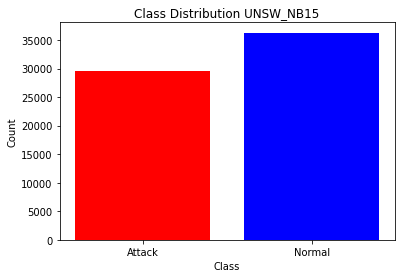

Missing Values Info:
{'proto_gre': 33, 'proto_idpr': 33, 'state_REQ': 33}


In [12]:
# Data Exploration
import matplotlib.patches as mpatches
def visualize_class_distribution(csv_file, Class,datasetName):
    # Read the CSV file into a pandas DataFrame
    dfm = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\new2_train (1).csv")
    # Check the class distribution
    class_counts = dfm[Class].value_counts()

    # Define class labels and corresponding colors
    class_labels = ['Attack', 'Normal']
    class_colors = ['blue', 'red']

    # Plot the class distribution
    plt.bar(class_counts.index, class_counts.values, color=class_colors)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution '+datasetName)
    plt.xticks(range(len(class_counts)), class_labels)

    # Create a legend
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(class_colors, class_labels)]
    plt.show()

def detect_missing_values(dfm):
    """
    Detect any missing values in the dataframe and return the features with missing values and their counts.

    Args:
        df (pd.DataFrame): Input pandas DataFrame

    Returns:
        dict: Dictionary where keys are feature names and values are the count of missing values
    """
    missing_values = dfm.isnull().sum()  # Get the count of missing values in each column
    missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
    
    return dict(missing_values)
dataset_file = "D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\new2_train (1).csv"
dataset_name = "UNSW_NB15"
class_column = "label"  # Replace with the actual class column name in your dataset
visualize_class_distribution(dataset_file, class_column, dataset_name)

# Detect missing values
dfm = pd.read_csv(dataset_file)
missing_values_info = detect_missing_values(dfm)
print("Missing Values Info:")
print(missing_values_info)
   


In [13]:
df['label'].value_counts(normalize=True)

1    0.550839
0    0.449161
Name: label, dtype: float64

In [18]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Load your dataset into a DataFrame (replace 'your_dataset.csv' with your actual file path)

def load_data(file_path):
    df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\train (1).csv")
    return df

def preprocess_data(df, targetName):
    features, target = df.drop(targetName, axis=1), df[targetName]
    continuous_features = features.select_dtypes(include=[np.number])
    categorical_features = features.select_dtypes(exclude=[np.number])

    scaler = StandardScaler()
    continuous_features = pd.DataFrame(scaler.fit_transform(continuous_features), columns=continuous_features.columns)

    encoder = OneHotEncoder()
    categorical_features = encoder.fit_transform(categorical_features).toarray()

    features = np.concatenate([continuous_features, categorical_features], axis=1)

    return features, target

def build_stacked_denoising_autoencoder(input_dim, encoding_dims=[32, 16]):
    input_layer = Input(shape=(input_dim,))
    output_layer = input_layer

    for encoding_dim in encoding_dims:
        # Add GaussianNoise layer to introduce noise at each layer's input
        noisy_input = GaussianNoise(0.1)(output_layer)  # Adjust noise level as needed

        # Encoder
        encoded = Dense(encoding_dim, activation='relu')(noisy_input)

        # Decoder
        decoded = Dense(input_dim, activation='sigmoid')(encoded)

        # Define autoencoder for this layer
        autoencoder_layer = Model(input_layer, decoded)
        autoencoder_layer.compile(optimizer=Adam(), loss='mean_squared_error')

        # Set the output of this layer as the input for the next layer
        output_layer = autoencoder_layer(noisy_input)

    # Stacked denoising autoencoder
    stacked_denoising_autoencoder = Model(input_layer, output_layer)
    stacked_denoising_autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    return stacked_denoising_autoencoder

def train_stacked_denoising_autoencoder(stacked_autoencoder, features, epochs=50):
    history = stacked_autoencoder.fit(features, features, epochs=epochs, batch_size=256, shuffle=True)
    return stacked_autoencoder, history

def fine_tune_with_gradient_boosting(features, missing_mask):
    adjusted_features = features.copy()
    feature_importance = np.zeros(features.shape[1])
    for i in range(features.shape[1]):
        model = GradientBoostingRegressor()
        valid_mask = ~missing_mask[:, i]
        model.fit(features[valid_mask, i].reshape(-1, 1), missing_mask[valid_mask, i])
        missing_proba = model.predict(features[~valid_mask, i].reshape(-1, 1))
        if np.sum(missing_mask[:, i]) > 0:
            adjusted_features[~valid_mask, i] *= missing_proba
        feature_importance[i] = model.feature_importances_
    return adjusted_features, feature_importance

def impute_with_stacked_autoencoder(stacked_autoencoder, features):
    # Identify the missing values in the features NumPy array
    missing_rows_mask = np.isnan(features).any(axis=1)
    missing_rows = features[missing_rows_mask]

    if missing_rows.shape[0] != 0:
        return features  # No missing values to impute

    imputed_features = features.copy()

    for i, row in enumerate(missing_rows):
        missing_row_mask = missing_rows_mask[i]
        if missing_row_mask:
            imputed_row = stacked_autoencoder.predict(row.reshape(1, -1))
            imputed_features[i] = imputed_row

    return imputed_features


def train_and_evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier(),
        "XGBoost": XGBClassifier(),
        "LightGBM": LGBMClassifier(),
        "Ensemble (Voting)": VotingClassifier(estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('dt', DecisionTreeClassifier()),
            ('rf', RandomForestClassifier())
        ], voting='hard')
}
    

    for name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
        print(f'{name} Precision: {precision_score(y_test, y_pred, average="weighted")}')
        print(f'{name} Recall: {recall_score(y_test, y_pred, average="weighted")}')
        print(f'{name} F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
        
#def visualize_missing_values(features, title):
#    missing_values = np.isnan(features).sum(axis=0)
#    plt.figure(figsize=(12, 6))
#    plt.bar(range(len(missing_values)), missing_values)
#    plt.xlabel('Features')
#    plt.ylabel('Missing Values Count')
#    plt.title(f'Missing Values Distribution {title}')
#    plt.xticks(range(len(missing_values)), range(1, len(missing_values) + 1), rotation=90)
#    plt.show()

def main(training_file_path, testing_file_path, targetName, output_file):
    # Load the training dataset (no missing values) and the testing dataset (with missing values)
    train_df = load_data("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\train (1).csv")
    train_features, train_target = preprocess_data(train_df, targetName)

    test_df = load_data("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\new2_train (1).csv")
    test_features, test_target = preprocess_data(test_df, targetName)  # Extract the target variable

    # Convert the testing dataset with missing values into a DataFrame
    test_df_missing = pd.DataFrame(test_features, columns=test_df.columns.drop('label'))
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_features, test_features, train_target, test_target

    # Train and evaluate classifiers before fixing missing values
    print("Performance metrics before fixing missing values: ")
    train_and_evaluate_classifiers(X_train, X_test, y_train, y_test)

   # Visualize the distribution of missing values before imputation
   # visualize_missing_values(train_features, "Before Imputation")

    # Build and train the SDA on the training dataset
    stacked_autoencoder = build_stacked_denoising_autoencoder(train_features.shape[1])
    stacked_autoencoder, _ = train_stacked_denoising_autoencoder(stacked_autoencoder, train_features, epochs=100)

    # Identify the missing values in the features NumPy array
    missing_rows_mask = np.isnan(test_features).any(axis=1)
    missing_rows = test_features[missing_rows_mask]

    if missing_rows.shape[0] > 0:
        # Impute missing values in the testing dataset using the trained SDA
        imputed_values = stacked_autoencoder.predict(missing_rows)
        test_features[missing_rows_mask] = imputed_values
        # Replace the corresponding rows in the original testing DataFrame with the imputed values
        test_df.loc[missing_rows_mask, test_df.columns.drop(targetName)] = imputed_values

    # Convert features back to a DataFrame
    features_df = pd.DataFrame(test_features, columns=test_df.columns.drop(targetName))

    # Visualize the distribution of missing values after imputation
 #   visualize_missing_values(features_df, "After Imputation")

    # Save the imputed data to the specified output file
    imputed_df = pd.concat([features_df, test_df[targetName]], axis=1)
    imputed_df.to_csv(output_file, index=False)
    print(f"Imputed data saved to '{output_file}'")

    # Now you can proceed with training and evaluating classifiers if needed
    X_train, X_test, y_train, y_test = train_features, test_features, train_target, test_target

    print("Performance metrics after fixing missing values: ")
    train_and_evaluate_classifiers(X_train, X_test, y_train, y_test)

    # Specify file paths for the training and testing datasets
training_dataset_file = "D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\train (1).csv"
testing_dataset_file = "D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\new2_train (1).csv"
output_file =   "D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updatedimputedvalues.csv" # Specify the path to save the imputed data

# Run the main function
main(training_dataset_file, testing_dataset_file, 'label', output_file)



Performance metrics before fixing missing values: 
Logistic Regression Accuracy: 0.9505655507477416
Logistic Regression Precision: 0.9505535609653167
Logistic Regression Recall: 0.9505655507477416
Logistic Regression F1 Score: 0.9505450391551702
Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1 Score: 1.0
Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0
SVM Accuracy: 0.9654748348895468
SVM Precision: 0.9657716857092672
SVM Recall: 0.9654748348895468
SVM F1 Score: 0.9654156728182282
KNN Accuracy: 0.9840127533591437
KNN Precision: 0.9840253811826889
KNN Recall: 0.9840127533591437
KNN F1 Score: 0.9840157152038742
XGBoost Accuracy: 1.0
XGBoost Precision: 1.0
XGBoost Recall: 1.0
XGBoost F1 Score: 1.0
[LightGBM] [Info] Number of positive: 36281, number of negative: 29584
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023739 seconds.
You can 

In [15]:
import pandas as pd
import numpy as np

# Load the imputed dataset from a CSV file (replace 'imputed_dataset.csv' with your file path)
imputed_df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updatedimputedvalues.csv")  # Adjust the file path as needed

# Assuming you have 'X' (features) and 'y' (labels) defined as follows:
X = imputed_df.drop(columns=['label'])  # Assuming 'label' is the target variable
y = imputed_df['label']

# Calculate the correlation matrix between features and the target variable
correlation_with_target = X.corrwith(y)

# Set a threshold for correlation values (e.g., 0.3 for positive or negative correlation)
correlation_threshold = 0.3

# Select features with correlation values above the threshold
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

# Create a new DataFrame with only the selected features
selected_df = X[selected_features]

# Save the selected features DataFrame to a CSV file
selected_df.to_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updated_selected_features.csv", index=False)

# Print the selected feature names
print("Selected features based on correlation with the target:")
print(selected_features)


Selected features based on correlation with the target:
['Unnamed: 0', 'id', 'rate', 'sttl', 'swin', 'ct_state_ttl', 'ct_dst_sport_ltm', 'proto_tcp', 'service_None', 'service_dns', 'state_CON', 'state_FIN', 'state_INT']


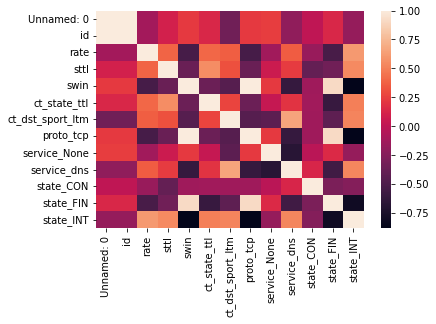

In [16]:
sns.heatmap(selected_df.corr())
plt.show()

Selected features based on correlation with the target:
['Unnamed: 0', 'id', 'rate', 'sttl', 'swin', 'ct_state_ttl', 'ct_dst_sport_ltm', 'proto_tcp', 'service_None', 'service_dns', 'state_CON', 'state_FIN', 'state_INT']


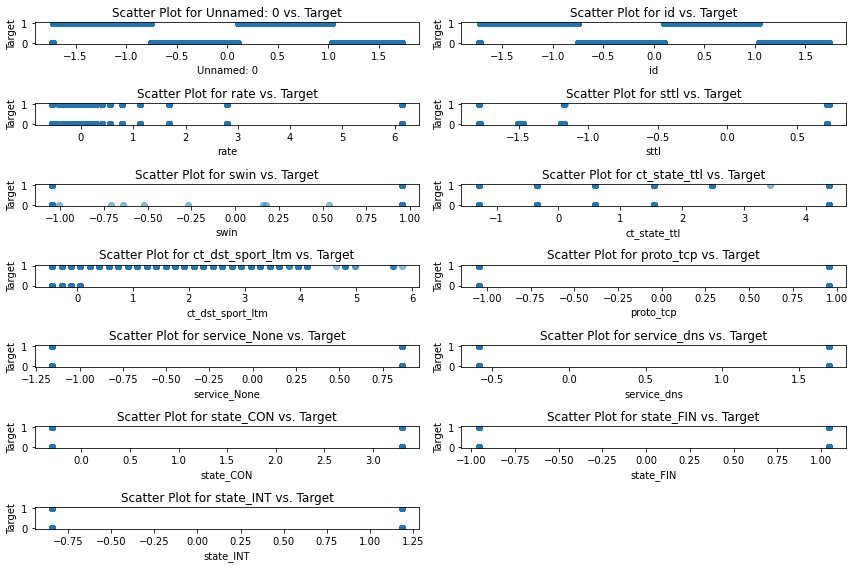

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the imputed dataset from a CSV file (replace 'imputed_dataset.csv' with your file path)
imputed_df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updatedimputedvalues.csv")  # Adjust the file path as needed

# Assuming you have 'X' (features) and 'y' (labels) defined as follows:
X = imputed_df.drop(columns=['label'])  # Assuming 'label' is the target variable
y = imputed_df['label']

# Calculate the correlation matrix between features and the target variable
correlation_with_target = X.corrwith(y)

# Set a threshold for correlation values (e.g., 0.3 for positive or negative correlation)
correlation_threshold = 0.3

# Select features with correlation values above the threshold
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

# Create a new DataFrame with only the selected features
selected_df = X[selected_features]

# Save the selected features DataFrame to a CSV file
selected_df.to_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updated_selected_features.csv", index=False)

# Print the selected feature names
print("Selected features based on correlation with the target:")
print(selected_features)

# Create subplots for selected features
num_rows = len(selected_features) // 2 + len(selected_features) % 2  # Calculate the number of rows for subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 8))

for idx, feature_name in enumerate(selected_features):
    row_idx, col_idx = idx // 2, idx % 2
    ax = axes[row_idx, col_idx]
    ax.scatter(imputed_df[feature_name], y, alpha=0.5)
    ax.set_title(f"Scatter Plot for {feature_name} vs. Target")
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Target")

# Remove any empty subplots if there are an odd number of features
if len(selected_features) % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()


Selected features based on correlation with the target:
['Unnamed: 0', 'id', 'rate', 'sttl', 'swin', 'ct_state_ttl', 'ct_dst_sport_ltm', 'proto_tcp', 'service_None', 'service_dns', 'state_CON', 'state_FIN', 'state_INT']


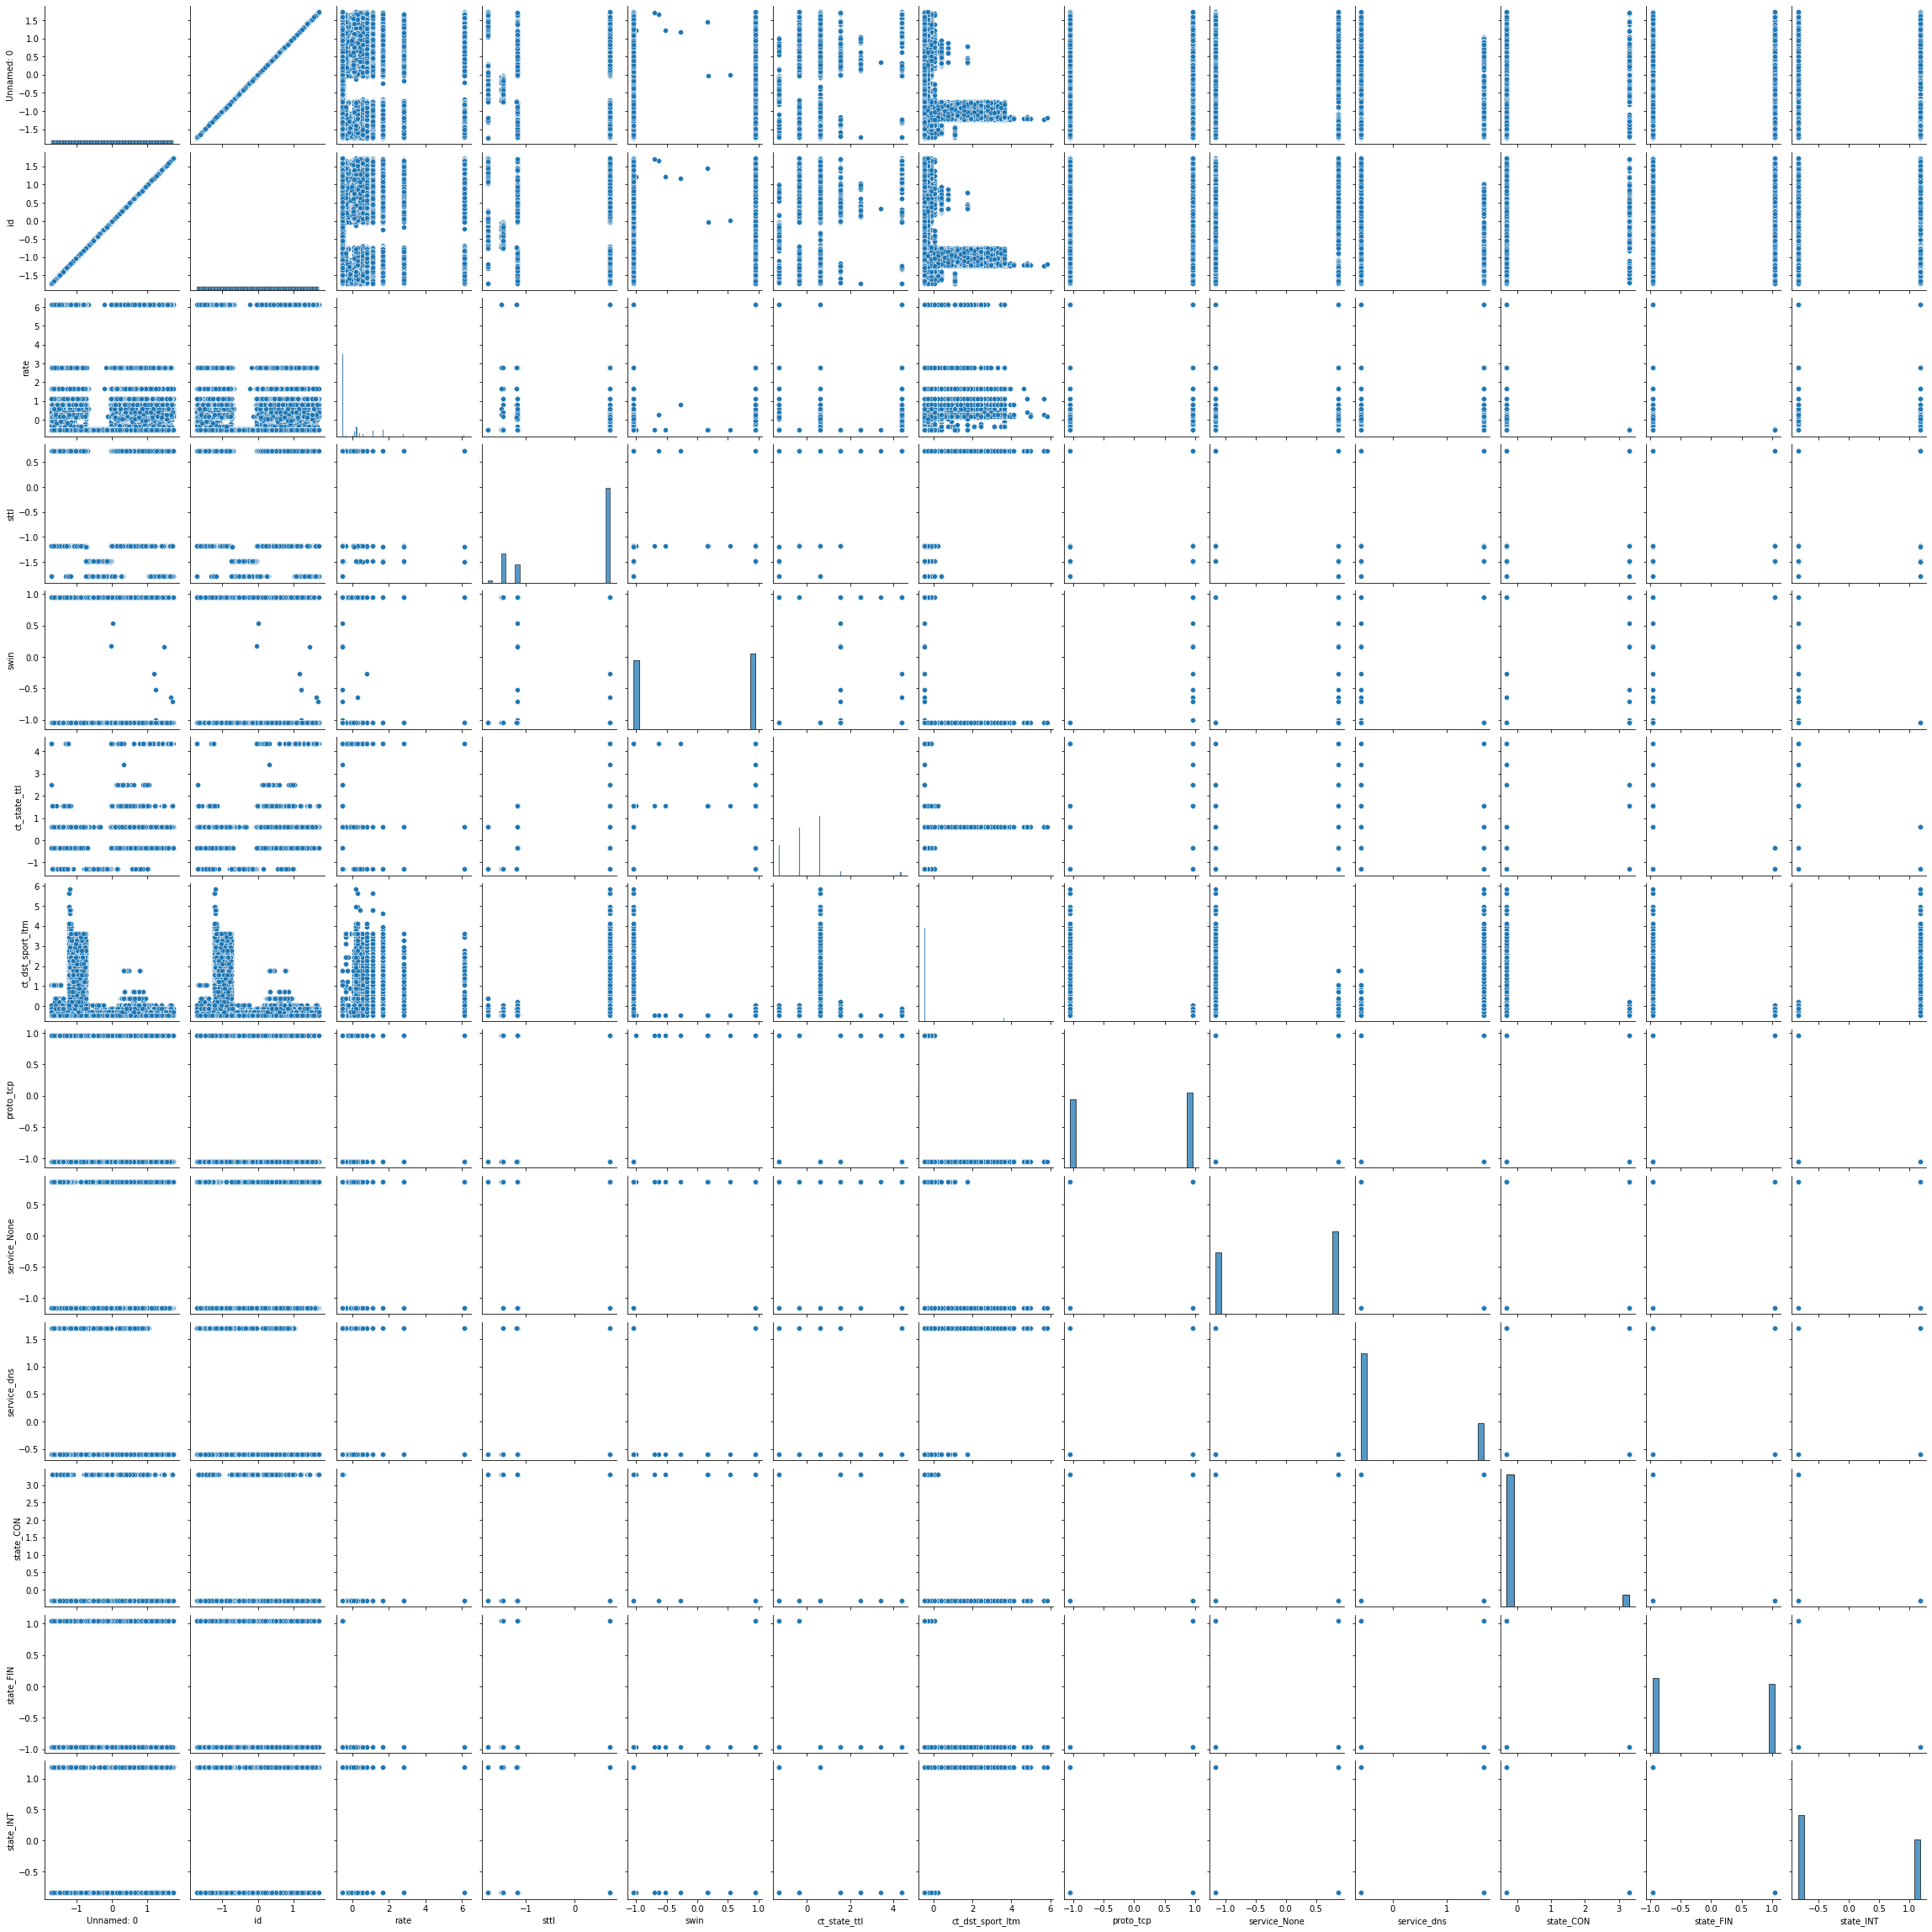

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the imputed dataset from a CSV file (replace 'imputed_dataset.csv' with your file path)
imputed_df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updatedimputedvalues.csv")  # Adjust the file path as needed

# Assuming you have 'X' (features) and 'y' (labels) defined as follows:
X = imputed_df.drop(columns=['label'])  # Assuming 'label' is the target variable
y = imputed_df['label']

# Calculate the correlation matrix between features and the target variable
correlation_with_target = X.corrwith(y)

# Set a threshold for correlation values (e.g., 0.3 for positive or negative correlation)
correlation_threshold = 0.3

# Select features with correlation values above the threshold
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

# Create a new DataFrame with only the selected features
selected_df = X[selected_features]

# Save the selected features DataFrame to a CSV file
selected_df.to_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updated_selected_features.csv", index=False)

# Print the selected feature names
print("Selected features based on correlation with the target:")
print(selected_features)

# Create pair plots for selected features
sns.pairplot(imputed_df[selected_features])
plt.show()


Selected features based on correlation with the target:
['Unnamed: 0', 'id', 'rate', 'sttl', 'swin', 'ct_state_ttl', 'ct_dst_sport_ltm', 'proto_tcp', 'service_None', 'service_dns', 'state_CON', 'state_FIN', 'state_INT']


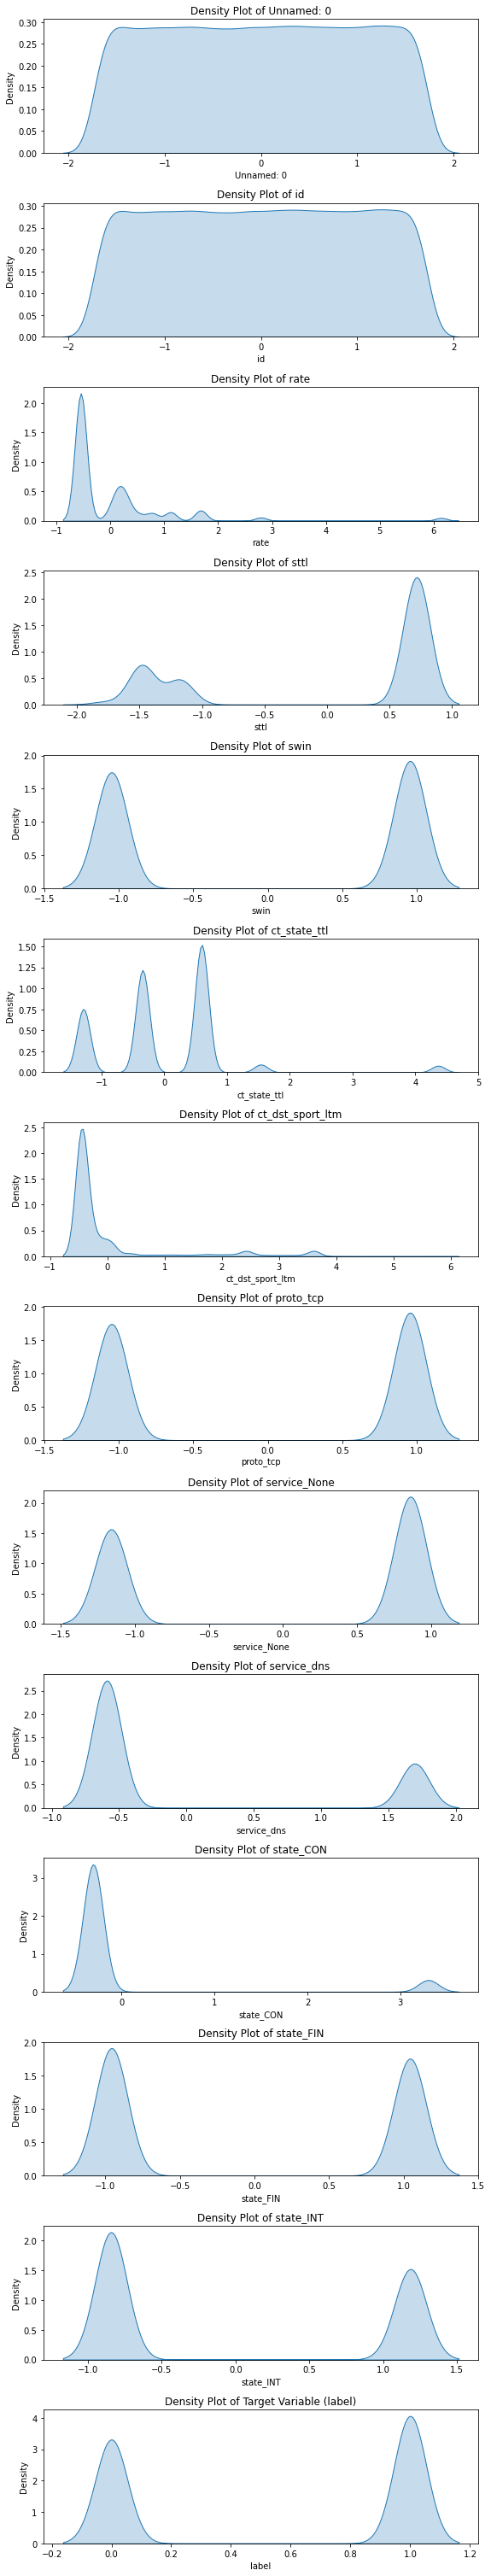

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the imputed dataset from a CSV file (replace 'imputed_dataset.csv' with your file path)
imputed_df = pd.read_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updatedimputedvalues.csv")  # Adjust the file path as needed

# Assuming you have 'X' (features) and 'y' (labels) defined as follows:
X = imputed_df.drop(columns=['label'])  # Assuming 'label' is the target variable
y = imputed_df['label']

# Calculate the correlation matrix between features and the target variable
correlation_with_target = X.corrwith(y)

# Set a threshold for correlation values (e.g., 0.3 for positive or negative correlation)
correlation_threshold = 0.3

# Select features with correlation values above the threshold
selected_features = correlation_with_target[abs(correlation_with_target) > correlation_threshold].index.tolist()

# Create a new DataFrame with only the selected features
selected_df = X[selected_features]

# Save the selected features DataFrame to a CSV file
selected_df.to_csv("D:\\data\\Outlier_dataset\\PhD\\updated_algorithm\\updated_selected_features.csv", index=False)

# Print the selected feature names
print("Selected features based on correlation with the target:")
print(selected_features)

# Create density plots for selected features and the target variable using subplots
num_features = len(selected_features)
num_rows = num_features + 1
fig, axes = plt.subplots(num_rows, 1, figsize=(8, 3 * num_rows))

# Plot density plots for selected features
for idx, feature_name in enumerate(selected_features):
    ax = axes[idx]
    sns.kdeplot(imputed_df[feature_name], fill=True, ax=ax)
    ax.set_title(f"Density Plot of {feature_name}")

# Plot density plot for the target variable
ax = axes[num_features]
sns.kdeplot(y, fill=True, ax=ax)
ax.set_title("Density Plot of Target Variable (label)")

plt.tight_layout()
plt.show()
